# IT496: Introduction to Data Mining (IDM)
# Course Project - 1
Made with ❤️ by Kunj Kapadiya (202103018) of DOPE-a-MINE (Team-18)

### Metro Train Dataset

This Dataset contains readings from pressure, temperature, motor current, and air intake valves collected from a compressor's Air Production Unit (APU) from a metro train. It consists of 15169480 data points collected at 1Hz from February to August 2020 and is described by 15 features from 7 analog (1-7) and 8 digital (8-15) sensors:
1. **TP2 (bar)** - Pressure on the compressor.
1. **TP3 (bar)** - Pressure generated at the pneumatic panel.
1. **H1 (bar)** - Pressure generated due to pressure drop when the discharge of the cyclonic separator filter occurs.
1. **DV pressure (bar)** - Pressure drop generated when the towers discharge air dryers; a zero reading indicates that the compressor is operating under load.
1. **Reservoirs (bar)** - Downstream pressure of the reservoirs, which should be close to the pneumatic panel pressure (TP3).
1. **Oil Temperature (ºC)** - Oil temperature on the compressor.
1. **Motor Current (A)** - Current of one phase of the three-phase motor; it presents values close to 0A - when it turns off, 4A - when working offloaded, 7A - when working under load, and 9A - when it starts working.
1. **COMP** - The electrical signal of the air intake valve on the compressor; it is active when there is no air intake, indicating that the compressor is either turned off or operating in an offloaded state.
1. **DV electric** - The electrical signal that controls the compressor outlet valve; it is active when the compressor is functioning under load and inactive when the compressor is either off or operating in an offloaded state.
1. **TOWERS** - The electrical signal that defines the tower responsible for drying the air and the tower responsible for draining the humidity removed from the air; when not active, it indicates that tower one is functioning; when active, it indicates that tower two is in operation.
1. **MPG** - The electrical signal responsible for starting the compressor under load by activating the intake valve when the pressure in the air production unit (APU) falls below 8.2 bar; it activates the COMP sensor, which assumes the same behavior as the MPG sensor.
1. **LPS** - The electrical signal that detects and activates when the pressure drops below 7 bars.
1. **Pressure Switch** - The electrical signal that detects the discharge in the air-drying towers.
1. **Oil Level** - The electrical signal detects the oil level on the compressor; it is active when the oil is below the expected values.
1. **Caudal Impulse** - The electrical signal that counts the pulse outputs generated by the absolute amount of air flowing from the APU to the reservoirs.


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/home/kunjkapadiya/downloads/metro-train-dataset.csv")
df = df.drop(columns="Unnamed: 0")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df15 = df[["TP2", "TP3", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current", "COMP", "DV_eletric", "Towers", "MPG", "LPS", "Pressure_switch", "Oil_level", "Caudal_impulses"]]
df7 = df[["TP2", "TP3", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current"]]
df8 = df[["COMP", "DV_eletric", "Towers", "MPG", "LPS", "Pressure_switch", "Oil_level", "Caudal_impulses"]]

In [3]:
df.shape

(1516948, 16)

In [4]:
df.dtypes

timestamp          datetime64[ns]
TP2                       float64
TP3                       float64
H1                        float64
DV_pressure               float64
Reservoirs                float64
Oil_temperature           float64
Motor_current             float64
COMP                      float64
DV_eletric                float64
Towers                    float64
MPG                       float64
LPS                       float64
Pressure_switch           float64
Oil_level                 float64
Caudal_impulses           float64
dtype: object

In [5]:
df.isnull().sum()

timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

Observe that we don't have any null values in our dataset.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TP2,1516948.0,1.367826,3.250930,-0.032,-0.014,-0.012,-0.0100,10.676
TP3,1516948.0,8.984611,0.639095,0.730,8.492,8.960,9.4920,10.302
H1,1516948.0,7.568155,3.333200,-0.036,8.254,8.784,9.3740,10.288
DV_pressure,1516948.0,0.055956,0.382402,-0.032,-0.022,-0.020,-0.0180,9.844
Reservoirs,1516948.0,8.985233,0.638307,0.712,8.494,8.960,9.4920,10.300
Oil_temperature,1516948.0,62.644182,6.516261,15.400,57.775,62.700,67.2500,89.050
Motor_current,1516948.0,2.050171,2.302053,0.020,0.040,0.045,3.8075,9.295
COMP,1516948.0,0.836957,0.369405,0.000,1.000,1.000,1.0000,1.000
DV_eletric,1516948.0,0.160611,0.367172,0.000,0.000,0.000,0.0000,1.000
Towers,1516948.0,0.919848,0.271528,0.000,1.000,1.000,1.0000,1.000


Observe that the values of `TP2`, `TP3`, `H1`, `DV_pressure`, `Reservoirs`, and `Motor_current` (approximately) ranges from 0 to 10. While that of `Oil_temperature` (approximately) ranges from 15 to 90. The rest of the eight digital sensors' values are binary 0 or 1.

In [7]:
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


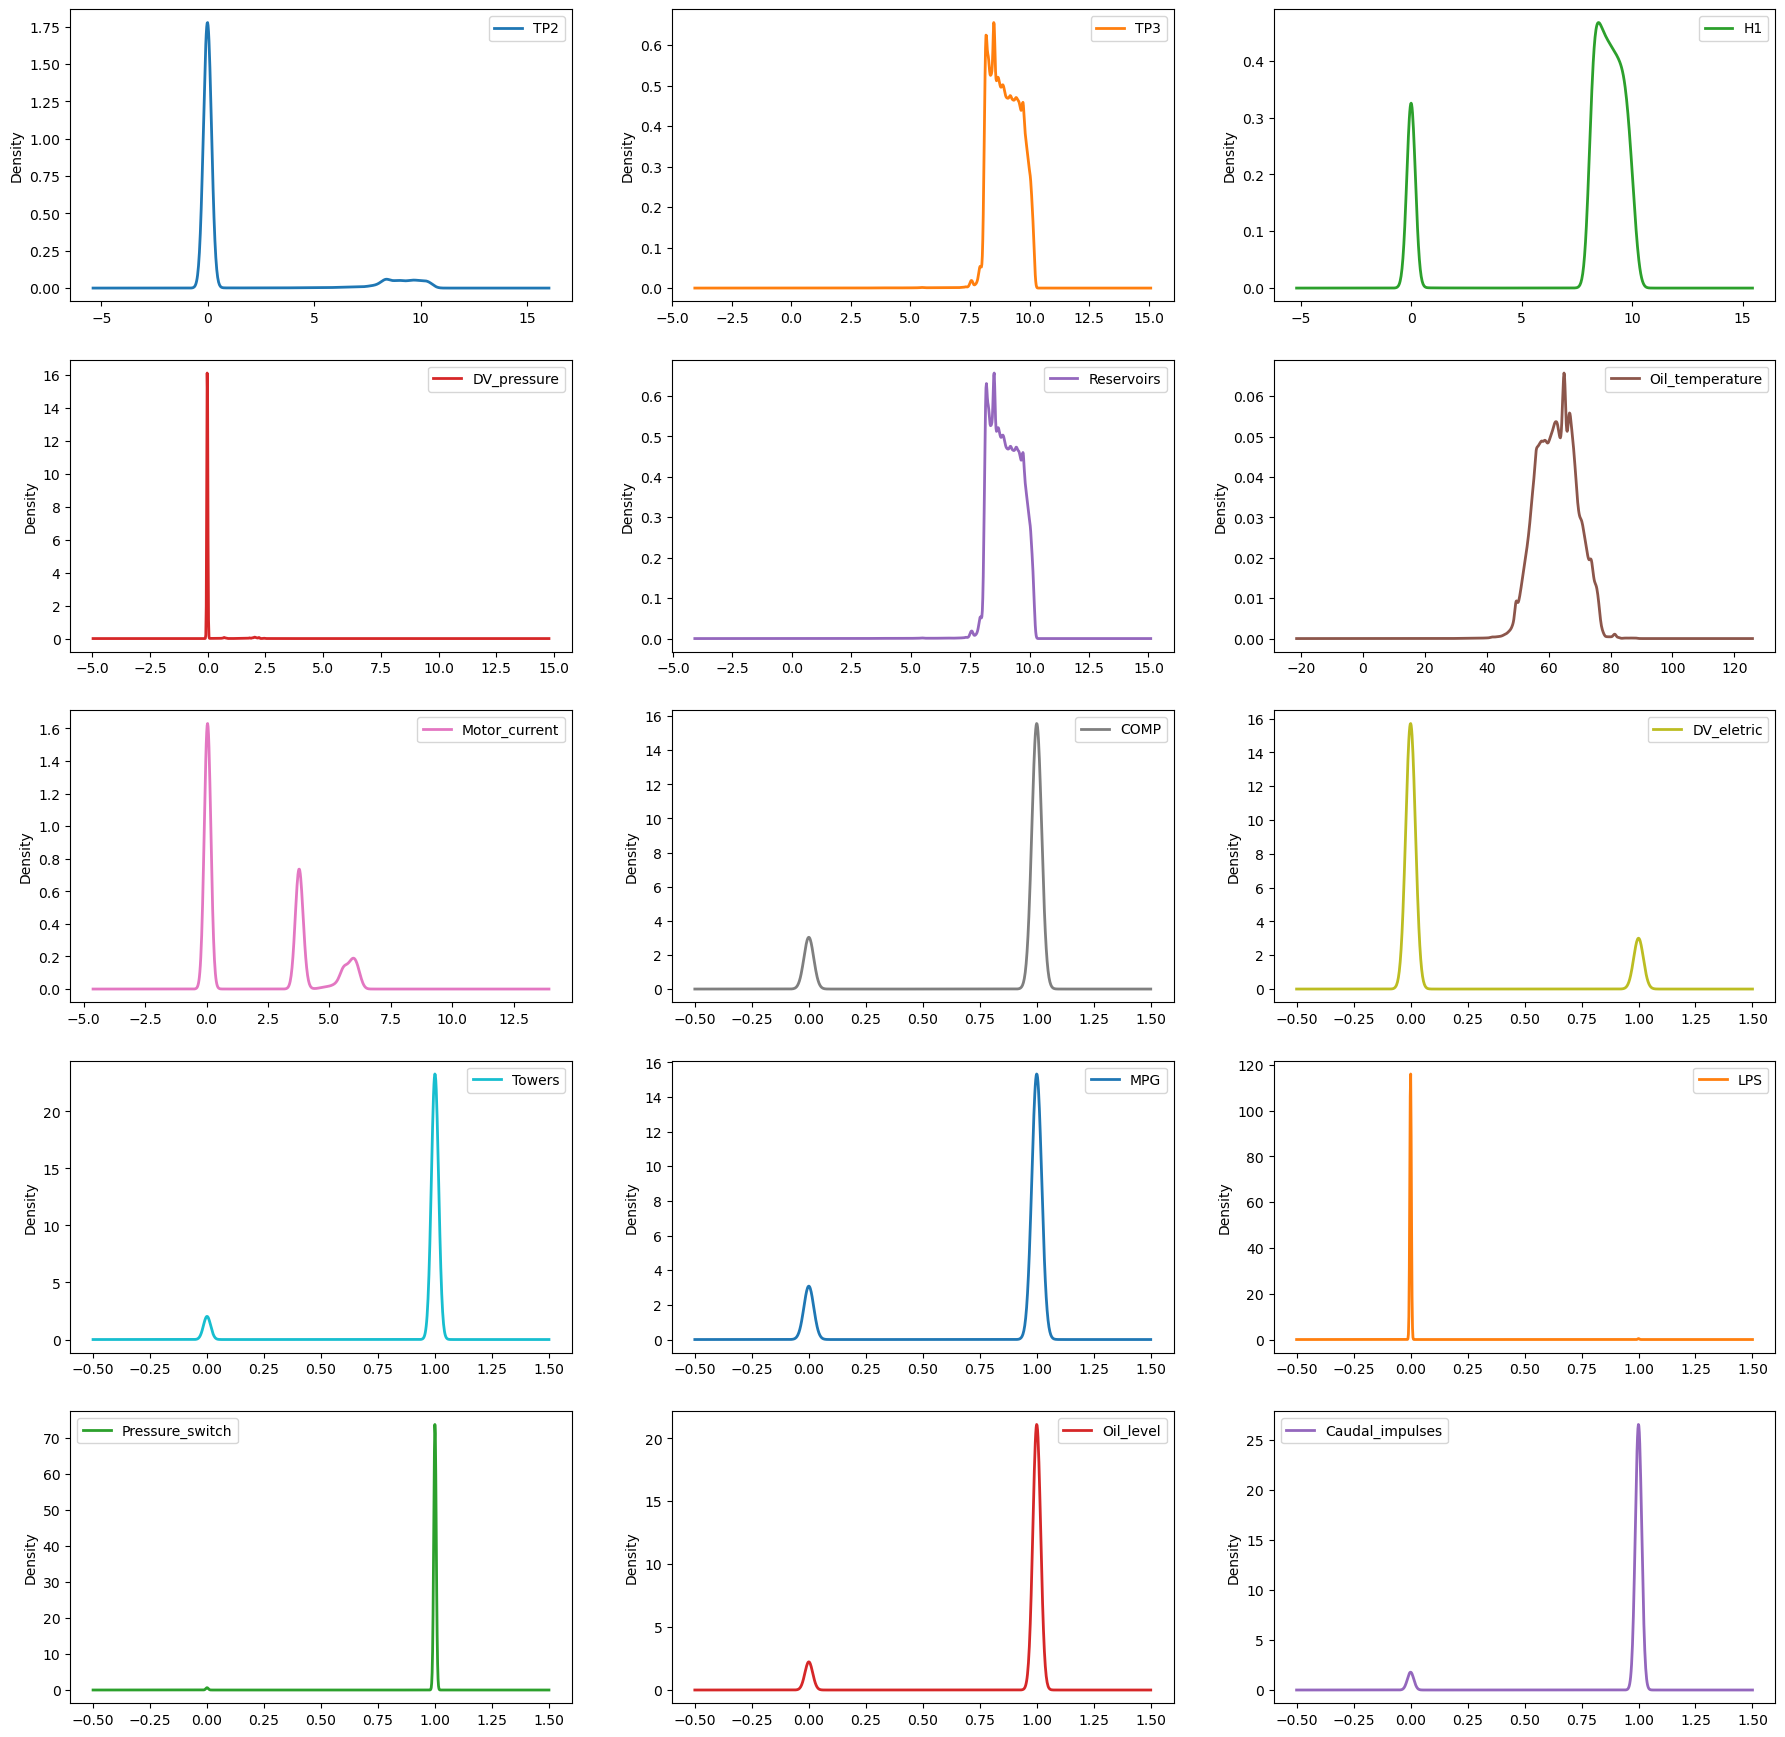

In [8]:
df15.plot(kind="kde", subplots=True, layout=(5, 3), figsize=(22,22), fontsize=10, linewidth=2, sharex=False)
plt.show()

Observe the kernel density estimation plot of our dataset.

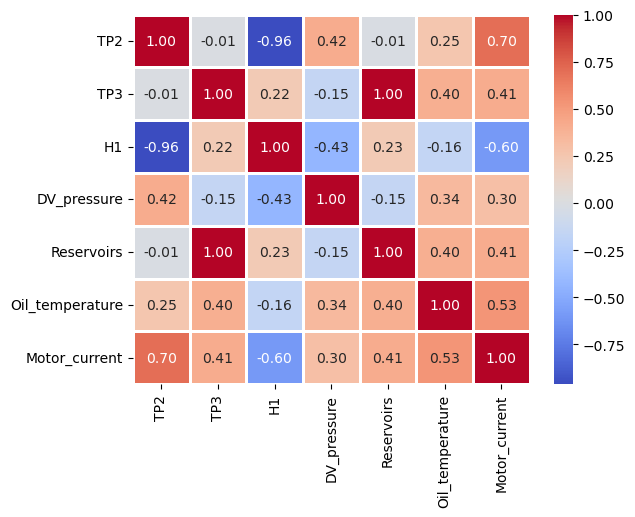

In [9]:
sns.heatmap(df7.corr(), annot=True, fmt=".2f", linewidth=2, cmap="coolwarm")
plt.show()

Observe the strong positive linear pearson correlation between (i) `TP2` & `Motor_current`, and (ii) `TP3` & `Reservoirs`. Also, the strong negative linear pearson correlation between (i) `TP2` & `H1`, and (ii) `H1` & `Motor_current`.

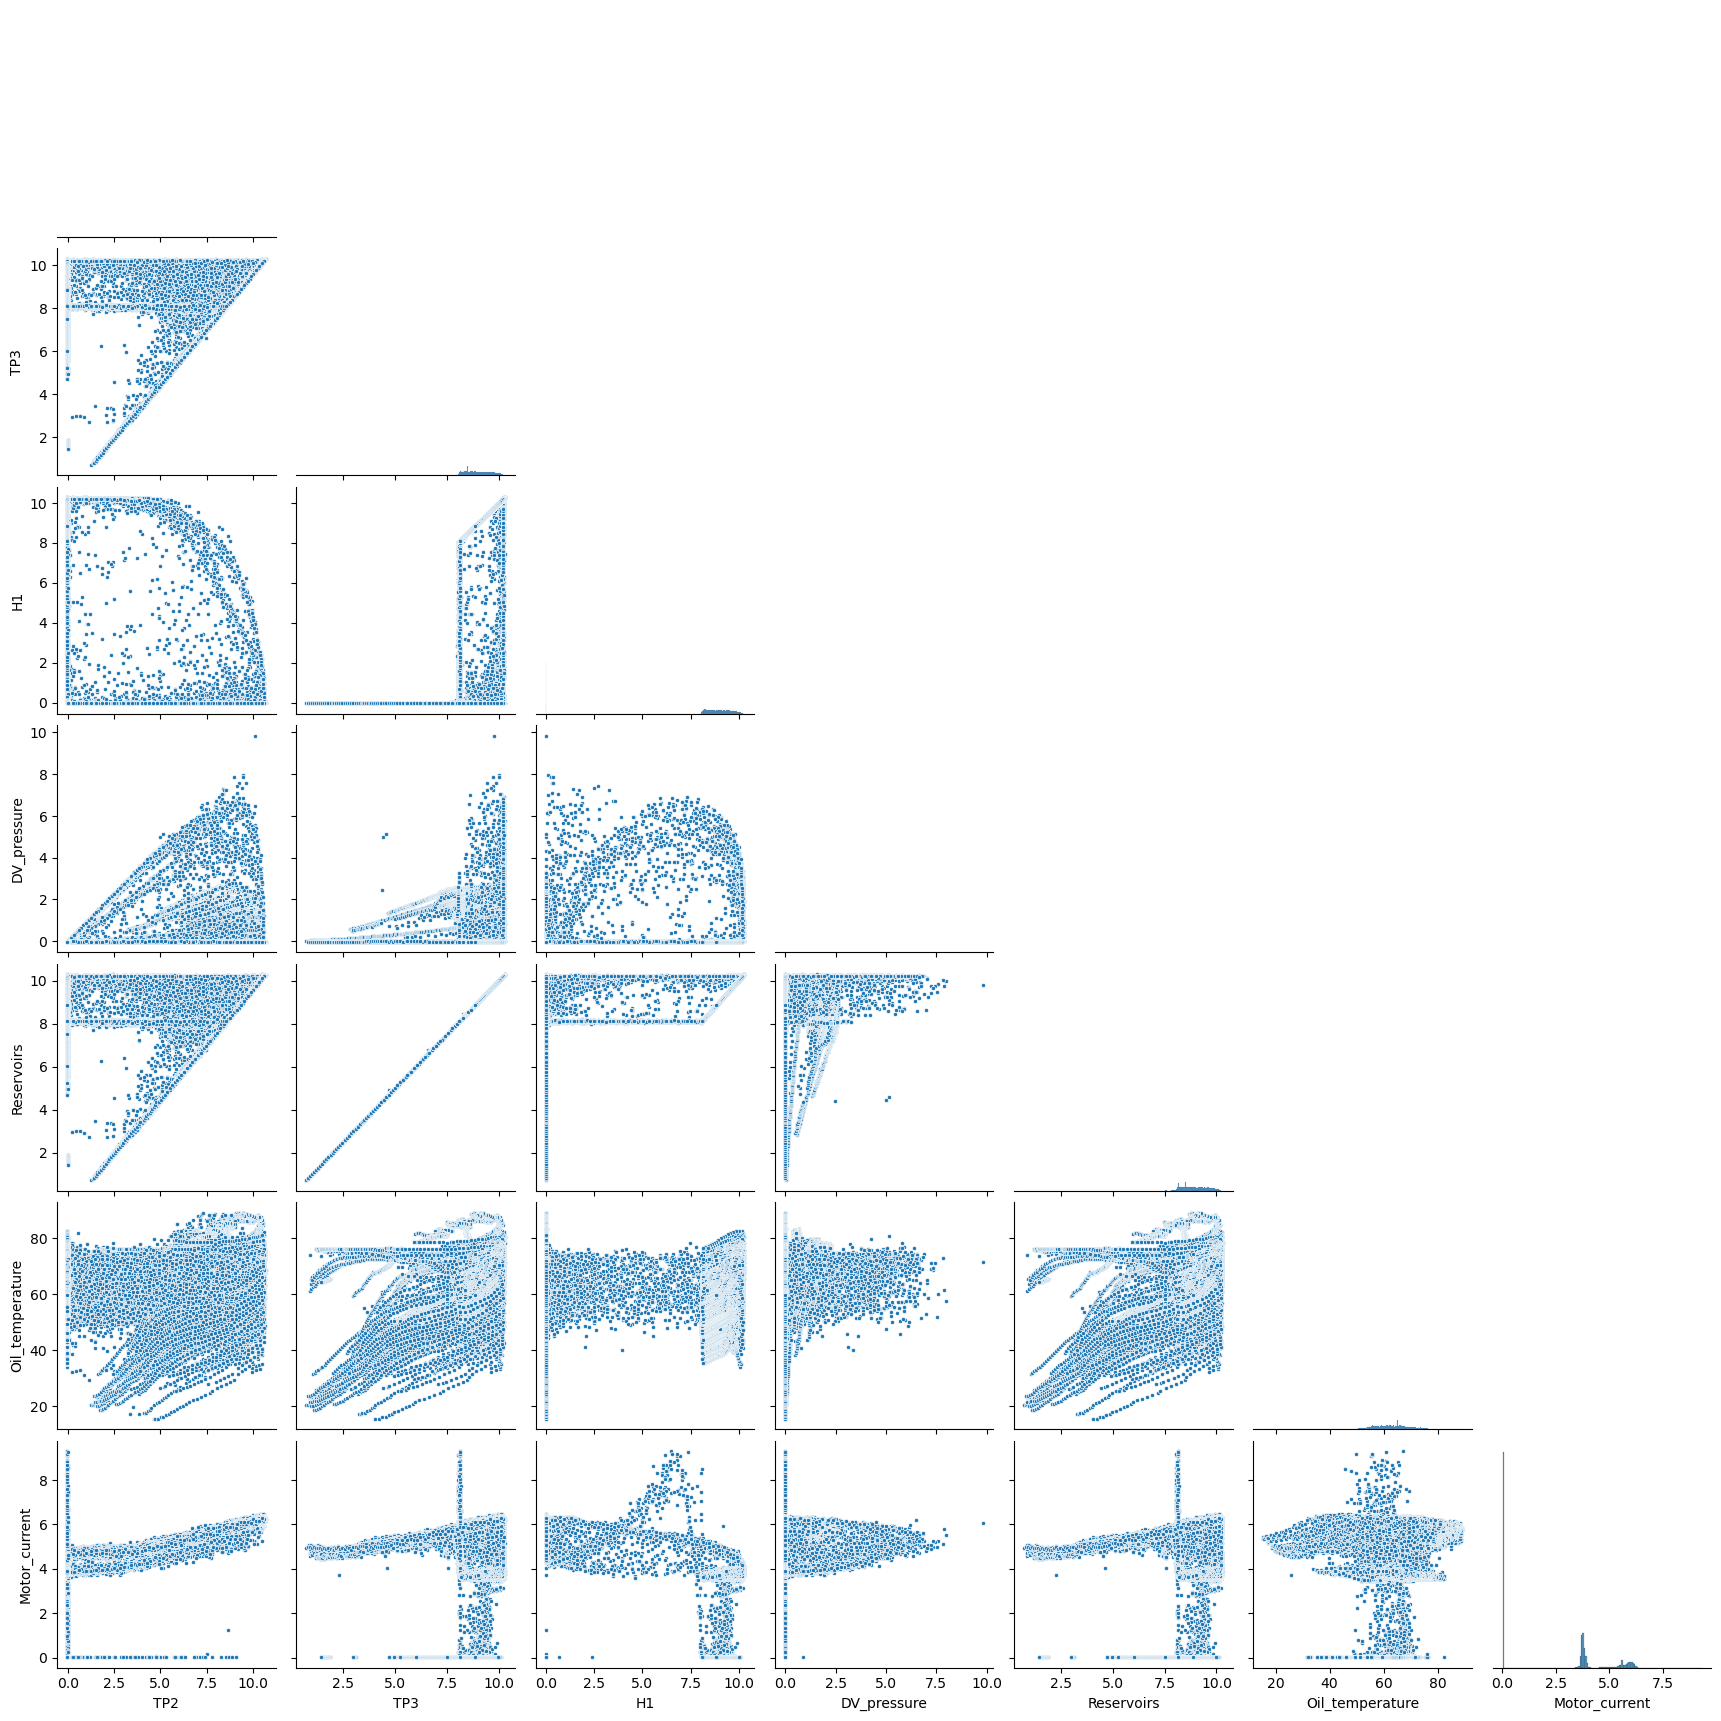

In [10]:
sns.pairplot(df7, corner=True, markers=".")

Observe how the correlation between `TP3` & `Reservoirs` is perfectly linear.

Dataset Link: https://www.kaggle.com/datasets/anshtanwar/metro-train-dataset